In [1]:
import seaborn as sns #this is the plotting library
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
from statistics import variance
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Data Cleaning

In [2]:
df1 = pd.read_csv('steps.csv', delimiter= ";"  )
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df = pd.merge(df1, df2, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


# Exploratory Data Analysis
### Week 1

In [6]:
def above_200(x):
    if(x > 200): 
        return float('NaN')
    else: 
        return x
    
df['weight'] = df['weight'].apply(above_200)

Here we see that most of the fitbit users weigh between 45 and 95 kg's.

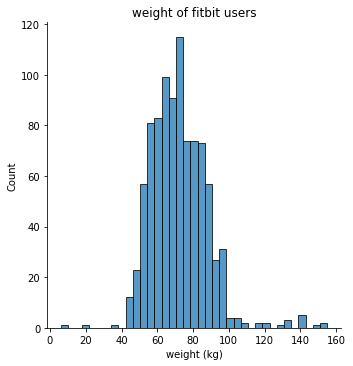

In [7]:
sns.displot(df['weight'].dropna(), kde=False) 
plt.title('weight of fitbit users')
plt.xlabel('weight (kg)')
plt.ylabel('Count')
plt.show()



Now we're going to create the variable mean steps per participant: 

In [8]:
df['mean'] = df.iloc[0:,5:337].mean(axis=1)
df.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9965.650888
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5552.321212
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8069.926174
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3038.500000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4949.827586


Let's plot the mean steps per participant:

/Users/evadorpmans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


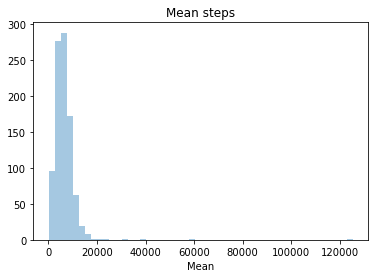

In [9]:
df['mean'].name = 'Mean' #Labeling the variable for plotting
mean_steps = df['mean'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(mean_steps, kde=False) 
plt.title('Mean steps')
plt.show()

In the graph above, we see the mean steps per person. However, there are some outliers that make the data difficult to read. Which is why there will also be a graph, that excludes outliers.  

The median steps per person is: 5798.145454545454
The mean steps per person: 6196.709449298818


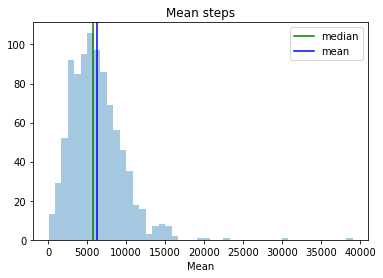

In [10]:
def above_40000(x):
    if(x > 40000): 
        return float('NaN')
    else: 
        return x
    
df['mean'] = df['mean'].apply(above_40000)

mean_size = df['mean'].mean()
median_size = df['mean'].median()

print(f'The median steps per person is: {median_size}')
print(f'The mean steps per person: {mean_size}')

df['mean'].name = 'Mean' #Labeling the variable for plotting
mean_steps = df['mean'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(mean_steps, kde=False) 
plt.title('Mean steps')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() 
plt.show()

In this graph (above) we see that the median and the mean are not that far apart from each other. However, what we also see is that there are still some outliers that have a lot more steps.

In this plot we see multiple things: first of all we see that 65+ is the age where the mean step per participant differs the most. In age 45-54 we see that there are the most outliers. Age <25 to 44, the mean step per participant is the most consistent. 

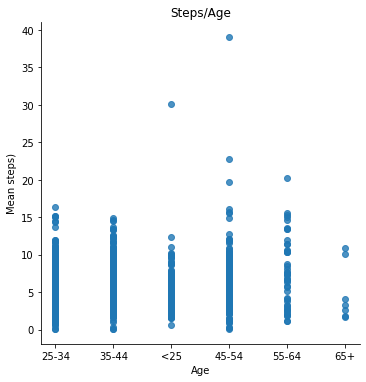

In [11]:
df['mean'] = df['mean']/ 1000 #get subscribers in millions
df['age'] = df['age']

sns.lmplot(x='age', y='mean', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Age') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps)')
plt.title('Steps/Age')
plt.show()

# Correlation
### Week 2 - going deeper into Exploratory data analysis

First the scatterplot:

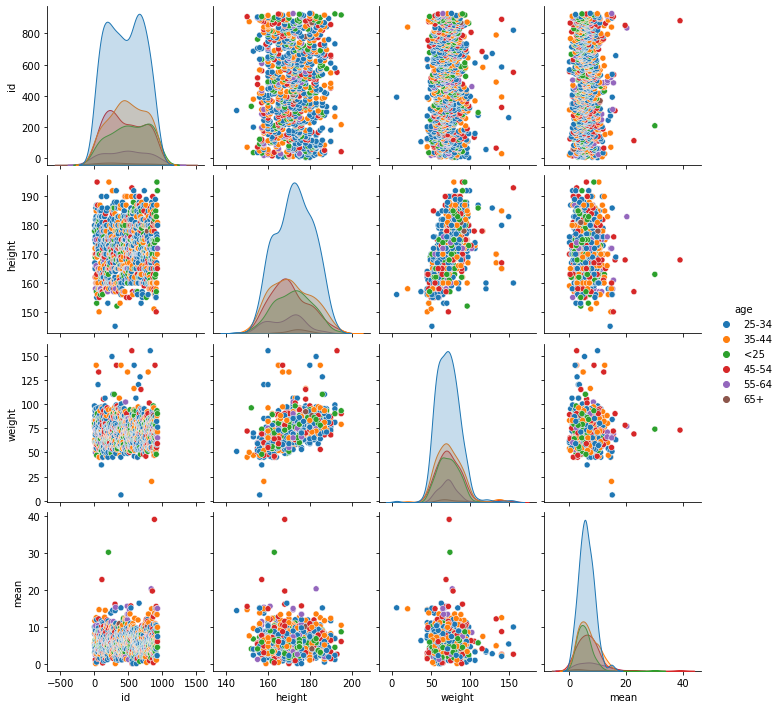

In [12]:
df_subset = df[["id", "gender","age","height","weight","mean"]]
sns.pairplot(df_subset, hue="age")
plt.show()

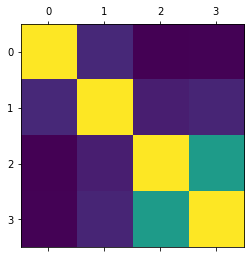

In [13]:
plt.matshow(df[['mean', 'id', 'weight', 'height']].corr())
plt.show()

A new variable is going to be added to the dataframe: BMI.

In [14]:
df['BMI'] = df['weight'] / (df['height']* df['height'])*10000
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean,BMI
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9.965651,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5.552321,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8.069926,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3.038500,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4.949828,21.872423


The BMI has been added, and next we see the new correlation table. We see that the weight has the biggest correlation with the BMI. Besides correlations between weight, height and BMI there are no other big correlations. There is no real correlation shown with the mean steps.

In [15]:
df[['mean', 'id', 'weight', 'height', 'BMI']].corr()

,mean,id,weight,height,BMI
mean,1.000000,0.041858,-0.081669,-0.075747,-0.051520
id,0.041858,1.000000,0.009494,0.028926,-0.004672
weight,-0.081669,0.009494,1.000000,0.513935,0.871410
height,-0.075747,0.028926,0.513935,1.000000,0.037571
BMI,-0.051520,-0.004672,0.871410,0.037571,1.000000


# Predictive model
### Week 3

Linear regression: how I understand it, is that linear regression predicts "something". It predicts a dependent variable, based on a independent variable. The dependent variable is always the Y and the indepedent is the X. That basically means that a linear regression finds a linear relationship between x and y. 

### Predictive model
Dummy variables.
I created the dummy variables but am not sure what to do with those.

In [22]:
pd.get_dummies(df[['gender', 'age']])

,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,0,1,1,0,0,0,0,0
1,0,1,0,1,0,0,0,0
2,0,1,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
924,1,0,0,0,1,0,0,0
925,0,1,0,0,0,0,0,1
926,0,1,0,1,0,0,0,0
927,1,0,0,0,0,1,0,0


Test & train data

In [17]:
def train_test_fun(percentage_train, df):
    len_train = round(percentage_train*len(df))
    train_data=df[0:len_train]
    test_data=df[len_train:len(df)]
    return train_data, test_data

In [18]:
train_data, test_data = train_test_fun(0.75, df)

Evaluation Data